# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

## Getting Data

In [2]:
data = pd.read_csv(r"C:\Users\91879\Downloads\Data_Science_Internship - Dump.csv",index_col= "Unnamed: 0")

## Basic Info & Preprocessing as per guidelines provided

In [3]:
data.head()

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [4]:
data = data[(data['status']=="WON") | (data['status']=='LOST')]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46317 entries, 0 to 46607
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Agent_id        46317 non-null  object
 1   status          46317 non-null  object
 2   lost_reason     43244 non-null  object
 3   budget          42623 non-null  object
 4   lease           43981 non-null  object
 5   movein          32707 non-null  object
 6   source          46317 non-null  object
 7   source_city     46317 non-null  object
 8   source_country  46317 non-null  object
 9   utm_source      46317 non-null  object
 10  utm_medium      46317 non-null  object
 11  des_city        46317 non-null  object
 12  des_country     46317 non-null  object
 13  room_type       22826 non-null  object
 14  lead_id         46317 non-null  object
dtypes: object(15)
memory usage: 5.7+ MB


In [6]:
data.describe().T

,count,unique,top,freq
Agent_id,46317,120,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,8186
status,46317,2,LOST,43244
lost_reason,43244,30,Low availability,8892
budget,42623,1851,£60 - £120 Per week,9750
lease,43981,311,Full Year Course Stay 40 - 44 weeks,11000
movein,32707,469,10/09/22,2450
source,46317,683,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,19092
source_city,46317,4316,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,8831
source_country,46317,185,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,18667
utm_source,46317,35,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,30873


In [7]:
data = data.replace('9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0', np.nan)
data.head()

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,NaN,NaN,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


### Unique Values in different columns

In [8]:
for column in data.columns:
    print(column+ " : ",data[column].nunique())

Agent_id :  120
status :  2
lost_reason :  30
budget :  1851
lease :  311
movein :  469
source :  682
source_city :  4315
source_country :  184
utm_source :  34
utm_medium :  63
des_city :  219
des_country :  14
room_type :  5
lead_id :  30491


In [9]:
#Function for univariate analysis of different columns
def univariate_analysis(column):
    plt.figure(figsize=(12,7))
    top = data[column].value_counts().nlargest(30)
    ax = sns.countplot(data=data[data[column].isin(top.index)], x=column)
    ax.tick_params(axis='x',rotation=90)
    plt.show()

## Reasons for lead failure

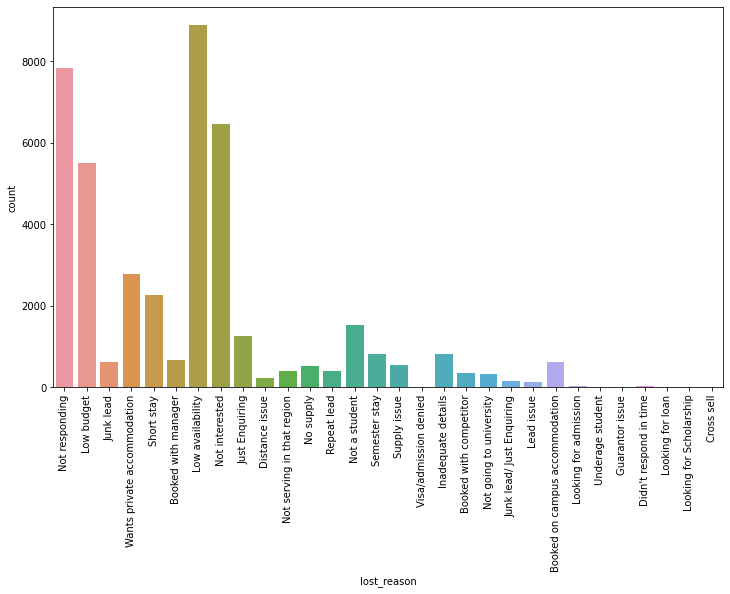

In [10]:
univariate_analysis('lost_reason')

## Handling Missing Values

In [11]:
print("Number of missing values in each column : ")
data.isnull().sum()

Number of missing values in each column : 


Agent_id              0
status                0
lost_reason        3073
budget             3694
lease              2336
movein            13610
source             5951
source_city        8831
source_country     8622
utm_source           61
utm_medium         3184
des_city           2529
des_country        2529
room_type         23491
lead_id               0
dtype: int64

<AxesSubplot:>

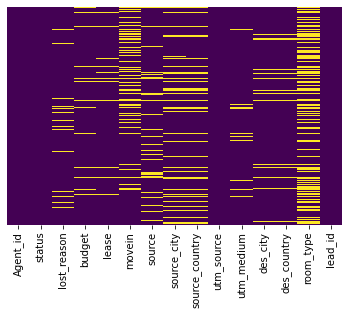

In [12]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
print("Precentage of Missing Values in each column : ")
(data.isnull().sum()/len(data))*100

Precentage of Missing Values in each column : 


Agent_id           0.000000
status             0.000000
lost_reason        6.634713
budget             7.975473
lease              5.043505
movein            29.384459
source            12.848414
source_city       19.066433
source_country    18.615195
utm_source         0.131701
utm_medium         6.874366
des_city           5.460198
des_country        5.460198
room_type         50.717879
lead_id            0.000000
dtype: float64

## We are going to remove irrelevant features as well as room_type which is having more than 50% null values

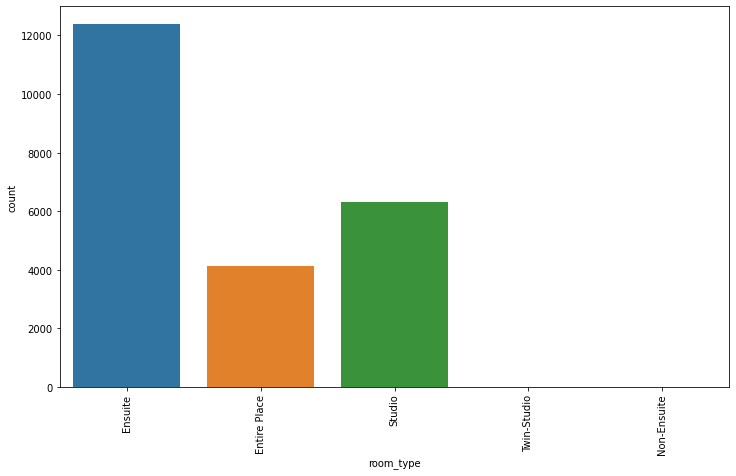

In [14]:
univariate_analysis('room_type')

In [15]:
def impute_nan(data):
    for column in data.columns:
        most_frequent_category = data[column].mode()[0]
        data[column].fillna(most_frequent_category,inplace=True)

# We are dopping column 'lost_reason' as it is having null values for all the won cases, which is causation and will make model to perform better at this data, but will make model to perform utterly at any new data provided

In [16]:
data = data.drop(['room_type','lost_reason','lead_id'],axis=1)

In [17]:
impute_nan(data)
data.isnull().sum()

Agent_id          0
status            0
budget            0
lease             0
movein            0
source            0
source_city       0
source_country    0
utm_source        0
utm_medium        0
des_city          0
des_country       0
dtype: int64

In [18]:
data.head()

,Agent_id,status,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,£60 - £120 Per week,Full Year Course Stay 40 - 44 weeks,10/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,£60 - £120 Per week,Full Year Course Stay 40 - 44 weeks,10/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,0-0,0,10/09/22,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,£60 - £120 Per week,Full Year Course Stay 40 - 44 weeks,10/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...


## Target Variable 

In [19]:
data['status'].value_counts()

LOST    43244
WON      3073
Name: status, dtype: int64

<AxesSubplot:xlabel='status', ylabel='count'>

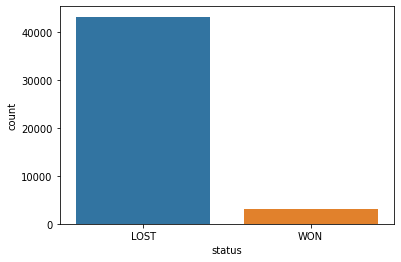

In [20]:
sns.countplot(data['status'])

## Feature Engineering

### Functions to tranform features such as budget, lease and date

In [21]:
def budget_range_estimation(budget):
    budget_range=[]
    budget_list = re.findall('\d*',budget)
    
    for budg in budget_list:
        if budg!='':
            budget_range.append(int(budg))
            
    if len(budget_range)==0:
        return '0-60'
           
    top = max(budget_range)
    if top<=60:
        return '0-60'
    elif top>60 and top<=120:
        return '61-120'
    elif top>120 and top<=180:
        return '121-180'
    elif top>180 and top<=240:
        return '181-240'
    elif top>240 and top<=300:
        return '240-300'
    elif top>300:
        return '>300'

In [22]:
def calculate_week(weeks):
    if weeks>=52:
        return('1 year or more')
    elif weeks>=39 and weeks<52:
        return('9 months - 1 year')
    elif weeks>=26 and weeks<39:
        return('6 months - 9 months')
    elif weeks>=13 and weeks<26:
        return('3 months - 6 months')
    elif weeks<13:
        return('less than 3 months')
    else:
        return('Other')

In [23]:
def categorize_lease_term(lease):
    if lease=='unavailable':
        return 'unavailable'
    nums=[]
    if re.search('year',lease)!=None or re.search('course',lease)!=None :
        return('1 year or more')
    elif re.search('month',lease)!=None:
        temp=re.findall('\d*',lease)
        for item in temp:
            if item!='':
                nums.append(int(item))
            
            return(calculate_week(round(max(nums)*4.3)))
    else:
        
        temp=re.findall('\d*',lease)
    
        for item in temp:
            if item!='':
                nums.append(int(item))

        if len(nums)==0:
            return 'Other'

        high=max(nums)
        return(calculate_week(max(nums)))

In [24]:
data['budget'] = data['budget'].apply(budget_range_estimation)
data['lease'] = data['lease'].apply(categorize_lease_term)

In [25]:
def configure_date(data):
    data['movein'] = pd.to_datetime(data['movein'],format="%d/%m/%y")
    data["Day"]= data["movein"].dt.day
    data["Month"]= data["movein"].dt.month
    data["Year"]= data["movein"].dt.year
    data.drop(['movein'],inplace=True,axis=1)

In [26]:
configure_date(data)

In [27]:
data.head()

,Agent_id,status,budget,lease,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,Day,Month,Year
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,61-120,9 months - 1 year,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,10,9,2022
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,61-120,9 months - 1 year,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,10,9,2022
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,121-180,9 months - 1 year,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,31,8,2022
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,0-60,less than 3 months,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,10,9,2022
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,61-120,9 months - 1 year,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,10,9,2022


## Handling Duplicates

In [28]:
data.duplicated().sum()

2137

In [29]:
data = data.drop_duplicates()

### Function for bivariate analysis

In [30]:
def bivariate_analysis(column):
    plt.figure(figsize=(12,7))
    top = data[column].value_counts().nlargest(30)
    ax = sns.countplot(data=data[data[column].isin(top.index)], x=column , hue="status", dodge=True)
    ax.tick_params(axis='x',rotation=90)
    plt.show()

# EDA

## Number of leads from different agents and their success ratio

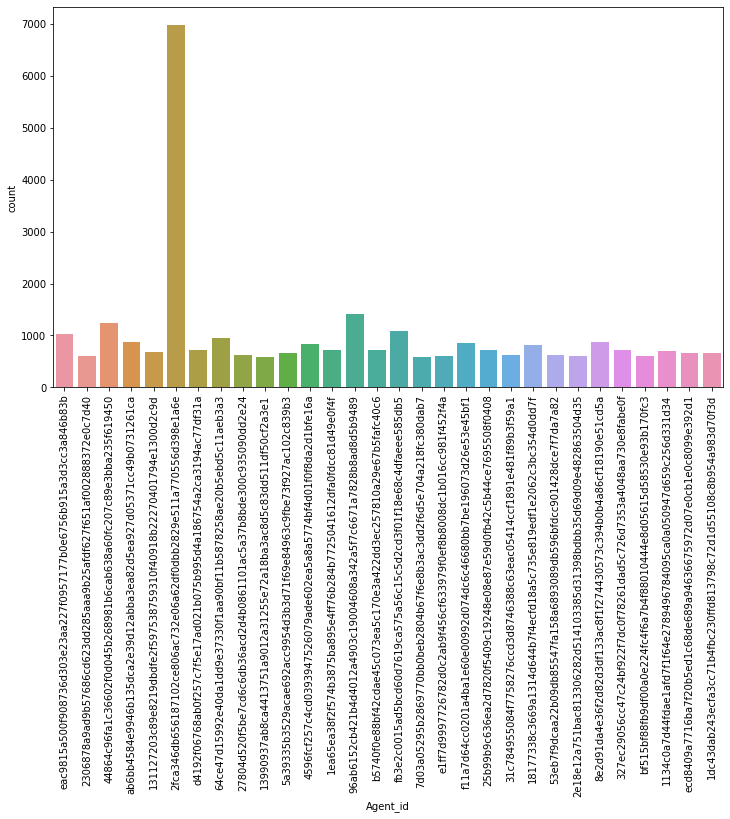

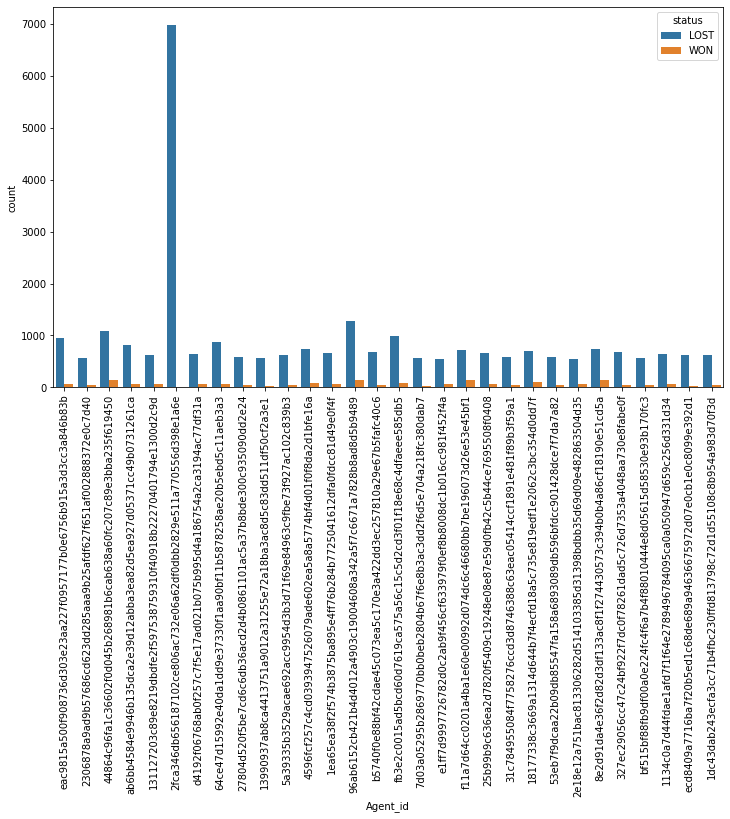

In [31]:
univariate_analysis('Agent_id')
bivariate_analysis('Agent_id')

## Leads differentiation on basis of budget and their convert ratio

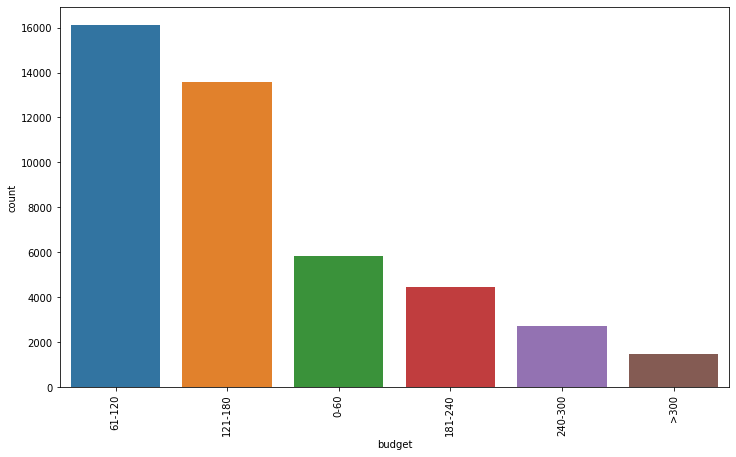

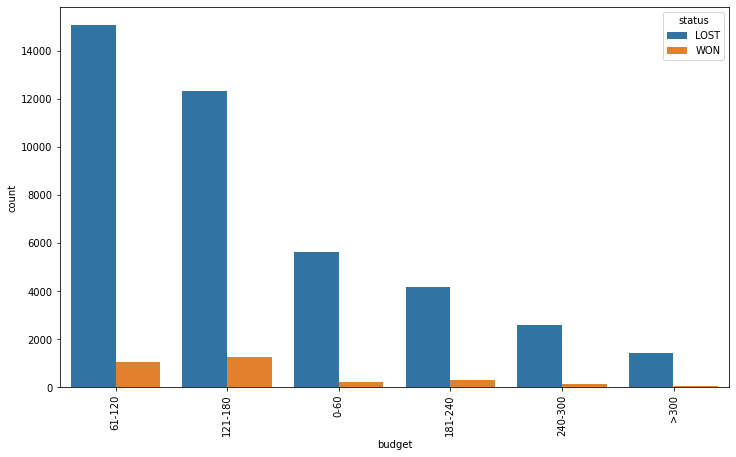

In [32]:
univariate_analysis('budget')
bivariate_analysis('budget')

## Lead differentiation on basis of duration of lease and their convert ratio

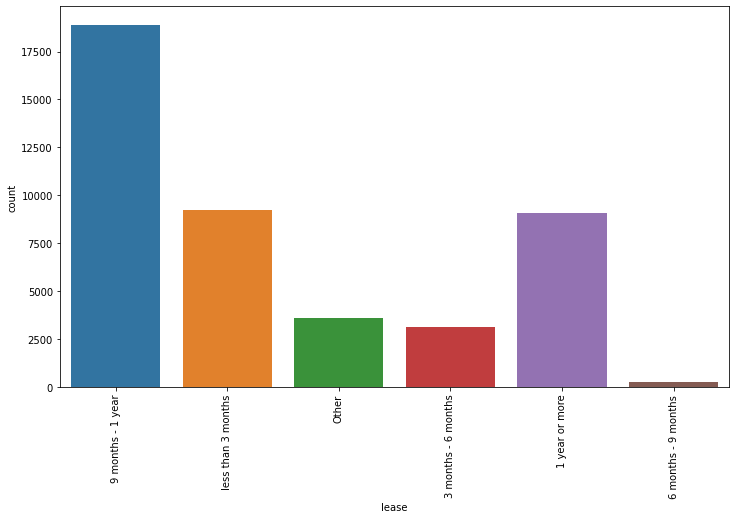

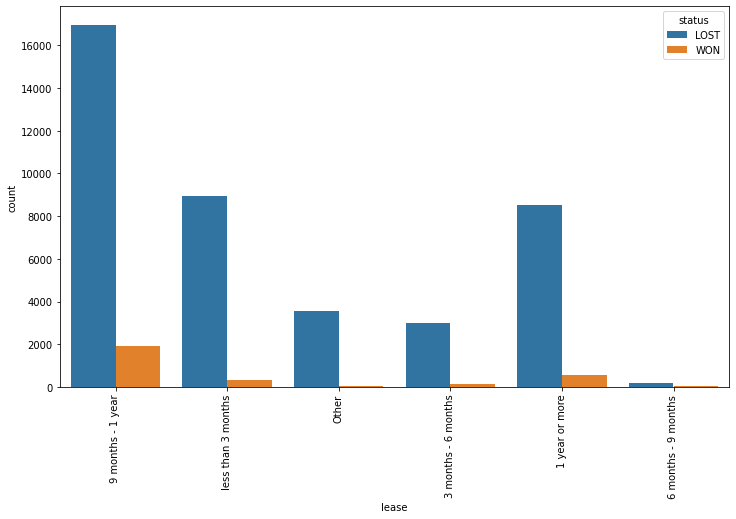

In [33]:
univariate_analysis('lease')
bivariate_analysis('lease')

## Distribution of move-in dates required in terms of day, month and year and their convert ratio

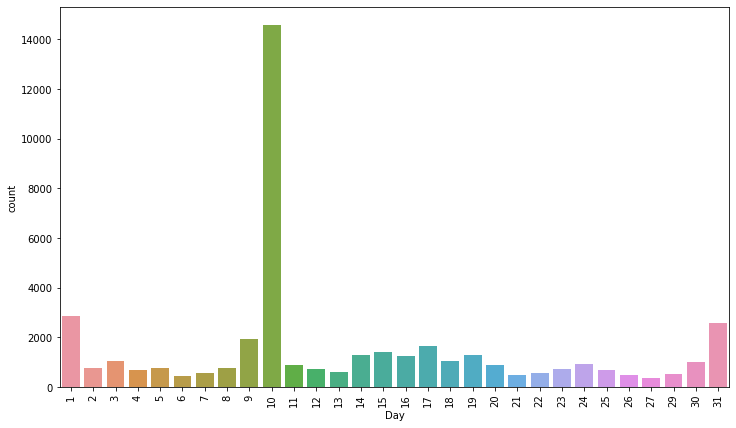

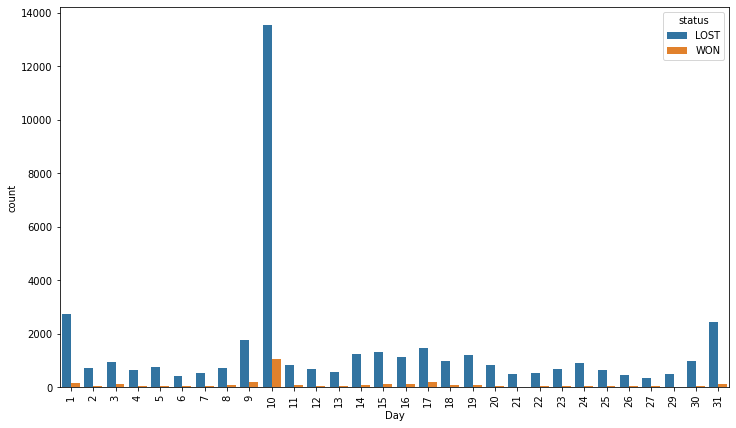

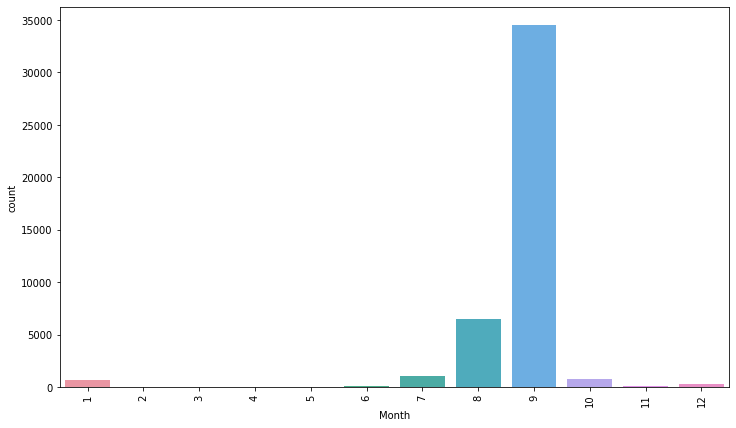

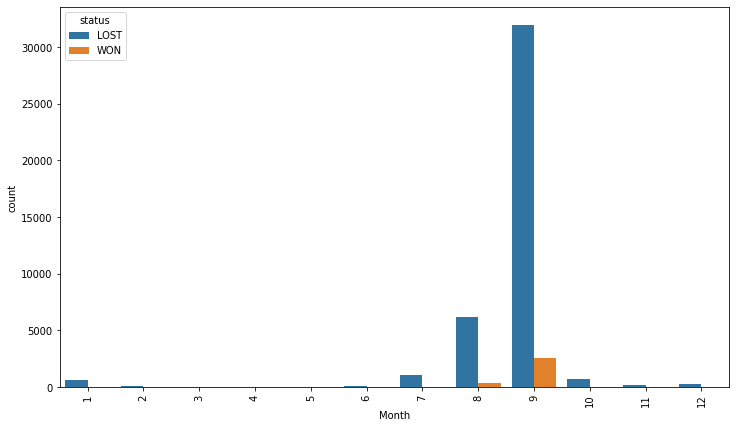

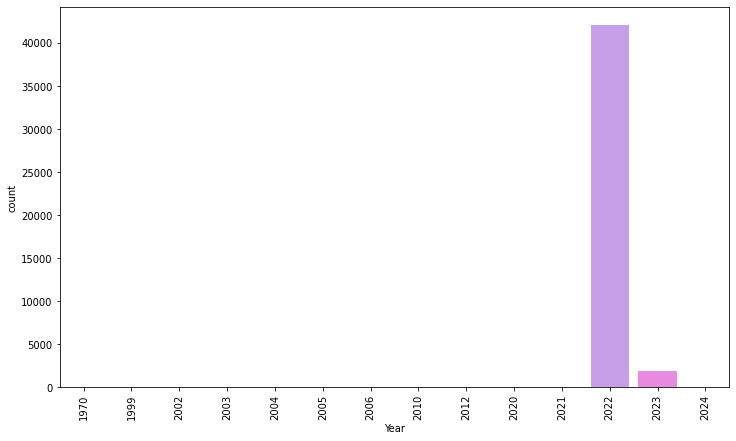

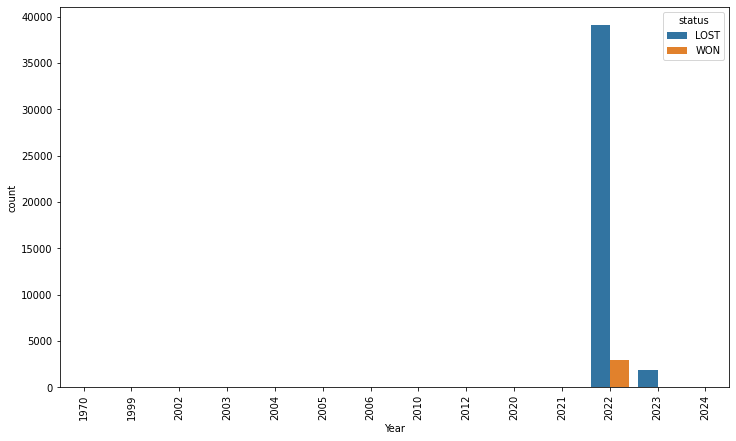

In [34]:
univariate_analysis('Day')
bivariate_analysis('Day')
univariate_analysis('Month')
bivariate_analysis('Month')
univariate_analysis('Year')
bivariate_analysis('Year')

## Distribution of leads on basis of UTM_source (advertiser, site, publication, etc. that is sending traffic to your property, for example: google, newsletter4, billboard.) and their convert ratio

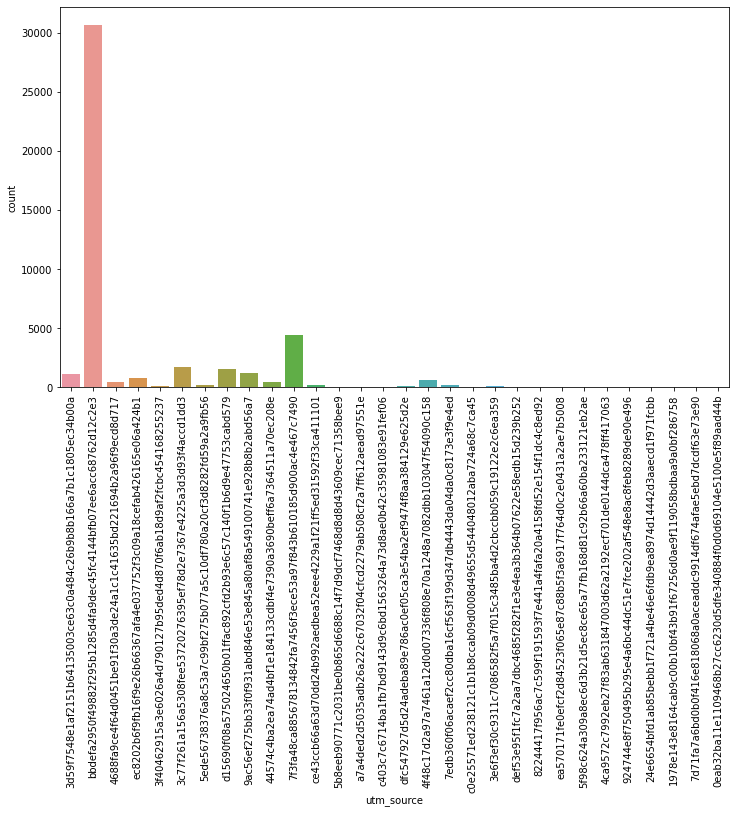

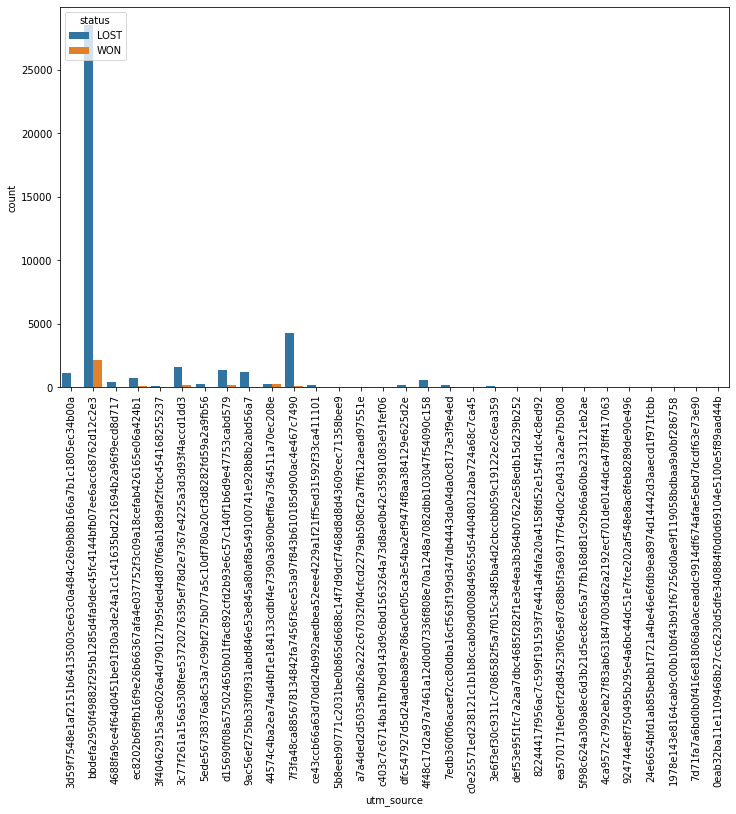

In [35]:
univariate_analysis('utm_source')
bivariate_analysis('utm_source')

## Distribution of leads on basis of UTM_medium (The advertising or marketing medium, for example: cpc, banner, email newsletter) and their convert ratio

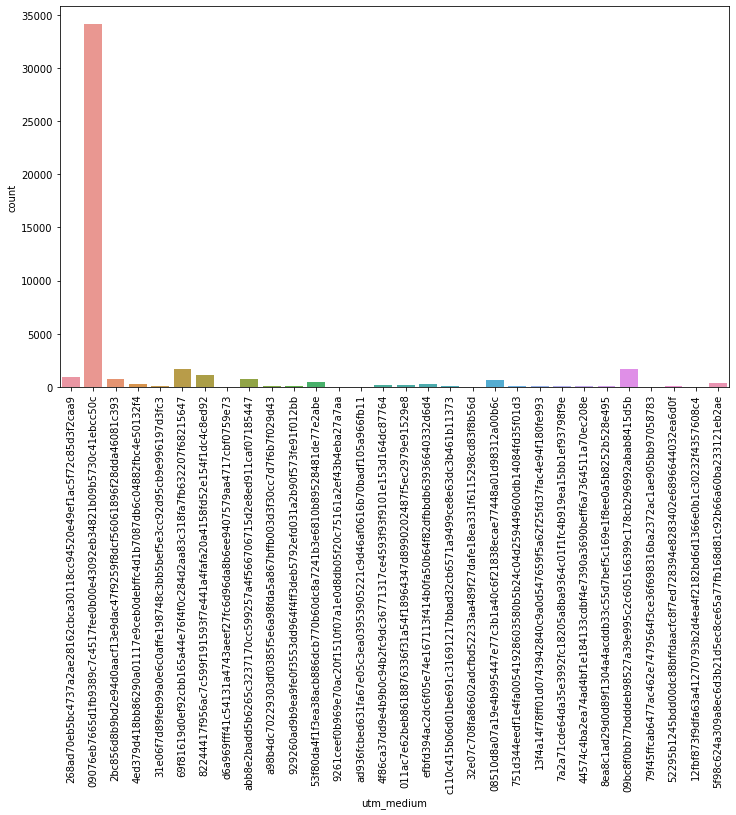

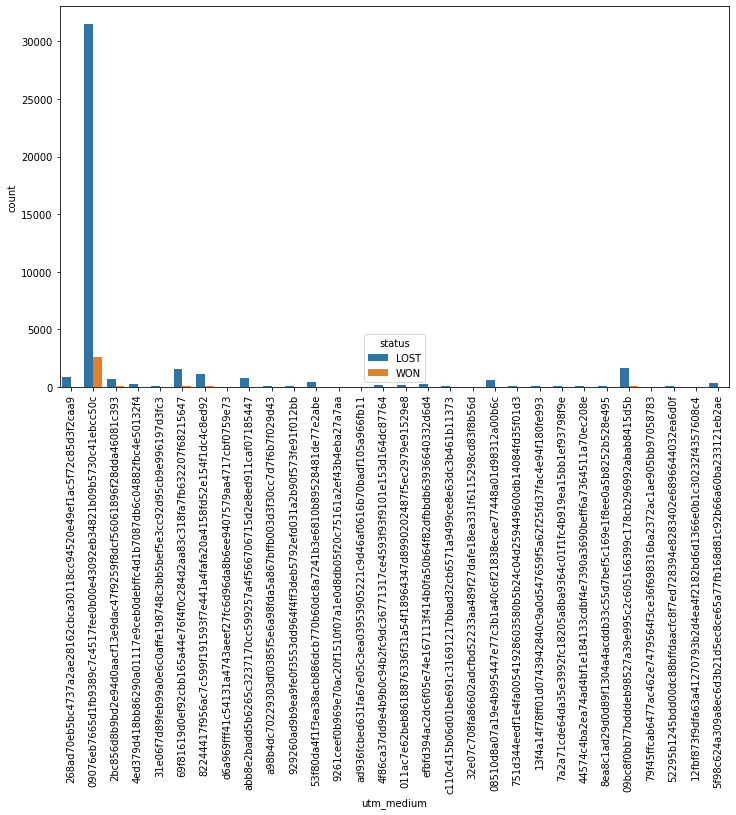

In [36]:
univariate_analysis('utm_medium')
bivariate_analysis('utm_medium')

## Encoding Variables

In [37]:
data['status'] = data['status'].map({'WON':1, 'LOST':0})

In [38]:
y = data['status']
x = data.loc[:,data.columns!="status"]

In [39]:
cat_cols = ['Agent_id', 'budget', 'lease', 'source', 'source_city',
       'source_country', 'utm_source', 'utm_medium', 'des_city', 'des_country']

In [40]:
encoder= LabelEncoder()
for i in cat_cols:
    x[i]= encoder.fit_transform(x[i])

In [41]:
x.head()

,Agent_id,budget,lease,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,Day,Month,Year
0,12,4,3,343,3995,165,5,10,205,8,10,9,2022
1,20,4,3,343,3995,165,5,10,74,8,10,9,2022
2,87,1,3,343,2619,165,25,3,18,8,31,8,2022
3,110,0,5,507,2817,165,25,3,26,8,10,9,2022
5,15,4,4,349,2103,100,25,3,210,8,10,9,2022


# We are doing train_test_split before feature selection and smote to prevent data leakage which may result into better results with this data but eventually will make model to predict utterly at any new data

## Train_Test_Split

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify=y)

## Feature Selection using Chi2 Test with SelectKBest

In [43]:
chi2_selector = SelectKBest(chi2)
x_train_chi2 = chi2_selector.fit_transform(x_train, y_train)
x_test_chi2 = chi2_selector.transform(x_test)

## Feature Scaling

In [44]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_chi2)
x_test_scaled = scaler.transform(x_test_chi2)

## Handling Imbalance in the data

In [45]:
y_train.value_counts()

0    32920
1     2424
Name: status, dtype: int64

In [46]:
smote = SMOTE(sampling_strategy='minority', random_state=42)
x_train_oversampled, y_train_oversampled = smote.fit_resample(x_train_scaled, y_train)

In [47]:
y_train_oversampled.value_counts()

0    32920
1    32920
Name: status, dtype: int64

# Trying out some base models to compare

In [48]:
model_lr=LogisticRegression()
model_lr.fit(x_train_oversampled, y_train_oversampled)
y_pred_lr=model_lr.predict(x_test_scaled)
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.95      0.53      0.68      8230
           1       0.09      0.60      0.15       606

    accuracy                           0.53      8836
   macro avg       0.52      0.57      0.41      8836
weighted avg       0.89      0.53      0.64      8836



In [49]:
svm_classifier = SVC()
svm_classifier.fit(x_train_oversampled, y_train_oversampled)
y_pred_svm=svm_classifier.predict(x_test_scaled)
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.96      0.64      0.77      8230
           1       0.12      0.66      0.20       606

    accuracy                           0.64      8836
   macro avg       0.54      0.65      0.49      8836
weighted avg       0.90      0.64      0.73      8836



In [50]:
KNN_classifier = KNeighborsClassifier()
KNN_classifier.fit(x_train_oversampled, y_train_oversampled)
y_pred_knn=KNN_classifier.predict(x_test_scaled)
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86      8230
           1       0.12      0.39      0.18       606

    accuracy                           0.76      8836
   macro avg       0.53      0.59      0.52      8836
weighted avg       0.89      0.76      0.81      8836



In [51]:
rf_classifier = RandomForestClassifier(n_jobs=-1)
rf_classifier.fit(x_train_oversampled, y_train_oversampled)
y_pred_rf=rf_classifier.predict(x_test_scaled)
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      8230
           1       0.26      0.18      0.21       606

    accuracy                           0.91      8836
   macro avg       0.60      0.57      0.58      8836
weighted avg       0.89      0.91      0.90      8836



## After looking into different tried models, we can see svm performed best in terms of recall for the positive cases, which is our main evaluation metric for the concerned problem statement, so we will tune svm model to perform more accurately 

# Tuned Model

In [52]:
svm_classifier_1 = SVC(kernel='poly',C=10)
svm_classifier_1.fit(x_train_oversampled, y_train_oversampled)
y_pred_svm_1=svm_classifier_1.predict(x_test_scaled)
print(classification_report(y_test,y_pred_svm_1))

              precision    recall  f1-score   support

           0       0.96      0.53      0.68      8230
           1       0.10      0.68      0.17       606

    accuracy                           0.54      8836
   macro avg       0.53      0.60      0.42      8836
weighted avg       0.90      0.54      0.64      8836



## Model performance did increased a bit getting recall score of 68 for the positive cases